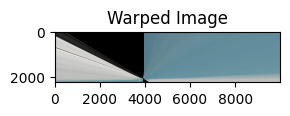

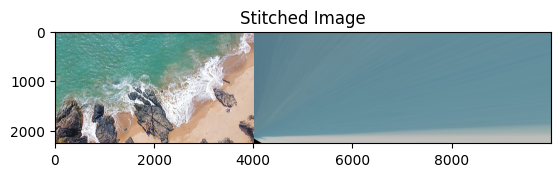

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load images
img_ = cv2.imread('coimbatore.jpg')
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
img = cv2.imread('gokarna.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Initialize SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# Create a BFMatcher object with distance measurement cv2.NORM_L2
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = False)
# Perfomr the matching between the SIFT descriptors of the images
matches = bf.knnMatch(des1,des2,k=2)
# Apply the ratio test to find good matches
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
# Atleast 4 matches are to be there to find the homography
if len(good)>4:
# prepare source and destination points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    # Compute Homography
    H, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    # Use homography to warp image
    dst = cv2.warpPerspective(img_,H, (img.shape[1]+img_.shape[1],img.shape[0]))
    # Convert warped image from BGR to RGB for matplotlib
    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    # Display the warped image
    plt.subplot(122), plt.imshow(dst_rgb), plt.title('Warped Image')
    plt.show()
    # Place the left image on the appropriate position
    dst[0:img.shape[0], 0:img.shape[1]] = img
    # Convert the combined image from BGR to RGB for matplotlib
    combined_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    # Save the stitched image as output.jpg in the BGR format
    cv2.imwrite('output.jpg',dst)
    # Display the stitched image
    plt.imshow(combined_rgb)
    plt.title('Stitched Image')
    plt.show()
else:
    raise AssertionError('Not enough matches are found - {}/{}'.format(len(good),4))